<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/HW3_5%2C3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 3.5

3.5 K-Means

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into k distinct clusters.  The goal is to group data points that are similar to each other and dissimilar to data points in other clusters.  Similarity is typically measured by Euclidean distance, though other distance metrics can be used.

**Key Concepts:**

* **Centroids:**  Each cluster is represented by a centroid, which is the mean of all data points assigned to that cluster.  These centroids act as the "center" of each cluster.
* **Iterations:** The algorithm iteratively refines the cluster assignments and centroid positions until convergence (when the centroids no longer change significantly or a maximum number of iterations is reached).
* **K:**  The number of clusters (k) is a hyperparameter that must be specified before running the algorithm. Choosing the optimal k is often a challenge. Methods like the elbow method or silhouette analysis can help determine an appropriate k value.

**Definitions:**

* **Cluster:** A group of data points that are more similar to each other than to data points in other clusters.
* **Data Point:** A single observation in the dataset, typically represented as a vector of features.
* **Euclidean Distance:**  The straight-line distance between two data points in n-dimensional space.  Calculated as the square root of the sum of squared differences between the coordinates of the two points.


**Math behind K-means:**

1. **Initialization:**  Randomly initialize k centroids, either by selecting k random data points from the dataset or by other initialization methods.

2. **Assignment:** Assign each data point to the nearest centroid.  The distance is typically calculated using Euclidean distance:

   Distance(x_i, c_j) = sqrt( Σ (x_ik - c_jk)^2 )

   where:
    * x_i represents the i-th data point.
    * c_j represents the j-th centroid.
    * x_ik and c_jk represent the k-th feature of x_i and c_j, respectively.

3. **Update:** Recalculate the position of each centroid by taking the mean of all data points assigned to that cluster:

    c_j = (1/N_j) Σ x_i

    where:
    * N_j is the number of data points assigned to the j-th cluster.
    * The sum is over all data points x_i assigned to the j-th cluster.


4. **Iteration:** Repeat steps 2 and 3 until convergence.  Convergence occurs when the centroids no longer change significantly or a predefined maximum number of iterations is reached.  The algorithm minimizes the within-cluster sum of squares (WCSS), which is the sum of squared distances between each data point and its assigned centroid.


The objective of the K-means algorithm is to find centroids that minimize the WCSS:

WCSS = Σ Σ (x_i - c_j)^2

where the first sum is over all clusters and the second is over all data points assigned to the cluster.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

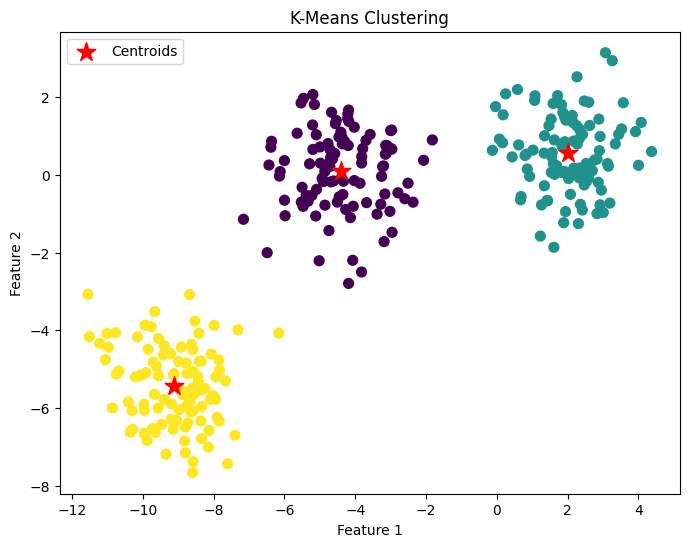

In [2]:
# Generate sample data
n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

3.6 Support Vector Machine


Support Vector Machines (SVMs) are powerful supervised learning algorithms used for classification and regression tasks.  They aim to find the optimal hyperplane that best separates data points of different classes.  Key concepts include:

* **Hyperplane:**  In a p-dimensional space, a hyperplane is a (p-1)-dimensional subspace that separates the data.  For example, in 2D, a hyperplane is a line; in 3D, it's a plane.  The SVM seeks the hyperplane that maximizes the margin.

* **Margin:** The margin is the distance between the hyperplane and the nearest data points of each class. These nearest data points are called support vectors.  SVMs aim to maximize this margin, which leads to better generalization performance.

* **Support Vectors:**  These are the data points closest to the hyperplane.  They are crucial because they determine the position and orientation of the hyperplane.  The SVM only depends on these support vectors and not the entire dataset.

* **Kernel Trick:**  SVMs can handle non-linearly separable data by using kernel functions.  A kernel function implicitly maps the data to a higher-dimensional feature space where it might become linearly separable.  Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

**Mathematical Formulation:**

Given a dataset {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}, where xᵢ is a data point and yᵢ is its corresponding class label (+1 or -1), the goal is to find the optimal hyperplane:

w⋅x + b = 0

where w is the weight vector and b is the bias term.  The margin is defined as:

Margin = 2 / ||w||

To maximize the margin, we need to minimize ||w|| subject to the constraint that all data points are correctly classified:

yᵢ(w⋅xᵢ + b) ≥ 1  for all i

This is a constrained optimization problem.  Using Lagrange multipliers and the Karush-Kuhn-Tucker (KKT) conditions, the problem can be reformulated in terms of the support vectors:

L(w, b, α) = 1/2 ||w||² - Σ αᵢ[yᵢ(w⋅xᵢ + b) - 1]

where αᵢ are the Lagrange multipliers.  The solution involves solving for the αᵢ values, which determine the support vectors.  The optimal weight vector w and bias b are then expressed as functions of the support vectors and their corresponding αᵢ values.

The Kernel trick allows for non-linear decision boundaries by replacing the dot product (xᵢ⋅xⱼ) with a kernel function K(xᵢ, xⱼ). This enables SVMs to handle complex data relationships without explicitly mapping data to a higher-dimensional space, as the kernel function computes the dot product implicitly.  This is computationally efficient.


Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Accuracy: 0.9


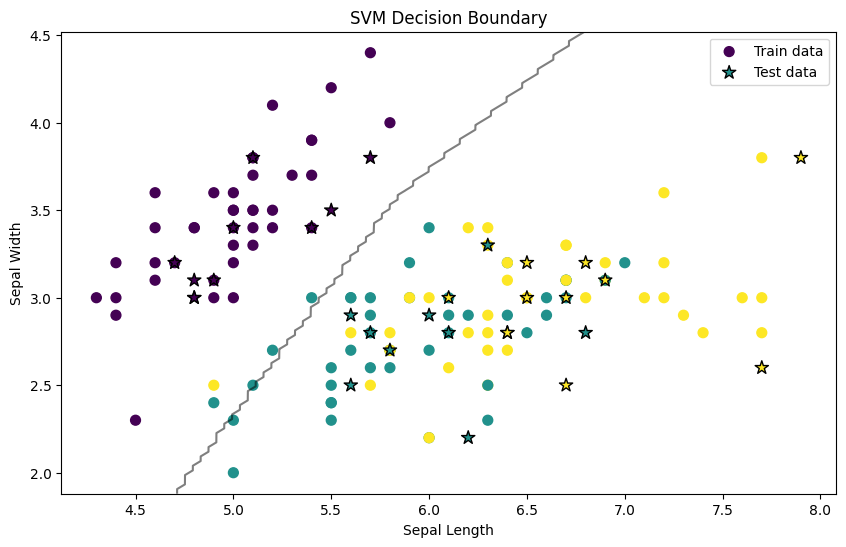

In [5]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis', label='Train data')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolor='k', marker='*', label='Test data')

xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z[:, 0].reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)
plt.title('SVM Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()